In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
save_fig = True
y = "hit_rate"
#y = "somac_performance"

In [11]:
def calc_heatmap(df):
    arr_avg = np.zeros((11, 11))
    arr_var = np.zeros((11, 11))
    
    for i in range(11):
        for j in range(11):

            arr_avg[i, j] = df[y].where((df["learn_rate"] == i/10.) & (df["discount"] == j/10.)).mean()
            arr_var[i, j] = df[y].where((df["learn_rate"] == i/10.) & (df["discount"] == j/10.)).var()
            #arr[i, j] = df["somac_performance"].where((df["learn_rate"] == i/10.) & (df["discount"] == j/10.)).mean()
    
    return arr_avg, arr_var

def plot_heatmap(arr, fig_name, save_fig = False):
    xlabels = [i for i in range(11)]
    ylabels = [i for i in range(11)]

    sns.heatmap(
        #arr, vmin = 60, vmax = 80, annot = True, linewidths = 0., xticklabels = xlabels, yticklabels = ylabels
        arr, annot = True, linewidths = 0., xticklabels = xlabels, yticklabels = ylabels
    )
    plt.title("(%)")
    plt.ylabel(r'$\alpha$' + " (x10)")
    plt.xlabel(r'$\gamma$' + " (x10)")

    if save_fig == True:
        plt.savefig(fig_name, bbox_inches='tight')
    
    plt.show()
    
    return

def run(f_name, fig_name, save_fig = False):
    # Return an array with heatmap values
    # arr: arr[learn_rate * 10, discount * 10]
    
    arr_avg = np.zeros((11, 11))
    arr_var = np.zeros((11, 11))

    for f in f_name:

        dic_data = np.load(f, encoding = "latin1").item()
        df = pd.DataFrame.from_dict(dic_data)

        temp_avg, temp_var = calc_heatmap(df)

        arr_avg = arr_avg + temp_avg
        arr_var = arr_var + temp_var

    arr_avg = (arr_avg / (len(f_name) * 1.)) * 100.
    arr_var = (arr_var / (len(f_name) * 1.)) * 1000.
    
    plt.figure(0)
    plot_heatmap(arr_avg, fig_name, save_fig = save_fig)
    plt.figure(1)
    plot_heatmap(arr_var, fig_name, save_fig = save_fig)
    #plt.figure(2)
    #arr = np.divide(arr_avg, arr_var)
    #plot_heatmap(arr, fig_name, save_fig = save_fig)
    
    return arr_avg

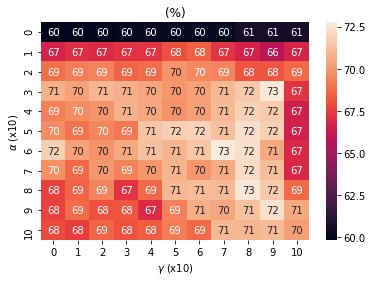

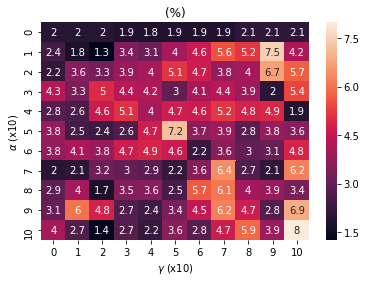

In [19]:
f_name = [
    "./_tmp/boltz/run.npy",
    "./_tmp/boltz/run3.npy",
    "./_tmp/boltz/run4.npy",
    "./_tmp/boltz/run2_0.npy",
    "./_tmp/boltz/run2_1.npy"
]

arr = run(f_name, "./_tmp/boltz_heatmap.pdf", save_fig = save_fig)

In [13]:
arr[10, 9]

72.55

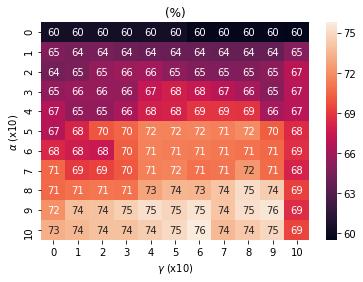

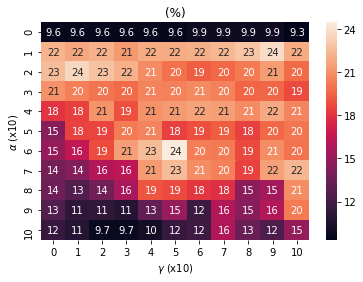

In [14]:
f_name = [
    "./_tmp/egreedy/run.npy",
    "./_tmp/egreedy/run3.npy",
    "./_tmp/egreedy/run4.npy"
]

_ = run(f_name, "./_tmp/egreedy_heatmap.pdf", save_fig = save_fig)

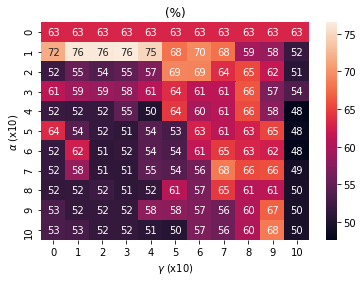

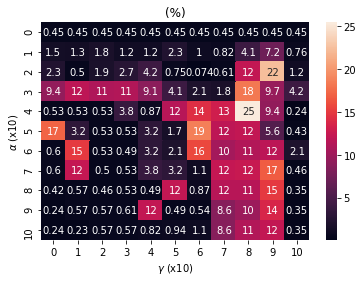

In [15]:
f_name = [
    "./_tmp/ucb/run.npy",
    "./_tmp/ucb/run3.npy",
    "./_tmp/ucb/run4.npy"
]

_ = run(f_name, "./_tmp/ucb_heatmap.pdf", save_fig = save_fig)